In [1]:
# Common libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

# Libraries for model training

from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split

# Libraries for algorithm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Removing warnings

import warnings
warnings.filterwarnings('ignore')

# Storing plots

%matplotlib inline

# Getting familiar with the dataset

In [2]:
ds=pd.read_csv("h1n1_vaccine_prediction.csv", delimiter=',')

In [3]:
ds.shape

(26707, 34)

In [4]:
ds.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [5]:
#dividing the columns into features and labels

features=ds.iloc[:,:-1]
labels=ds.iloc[:,[33]]

In [6]:
labels.head()

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0


In [7]:
features.shape

(26707, 33)

In [8]:
labels.shape

(26707, 1)

In [9]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [10]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   h1n1_vaccine  26707 non-null  int64
dtypes: int64(1)
memory usage: 208.8 KB


# DATA PRE-PROCESSING

In [11]:
features.duplicated().sum()

0

In [12]:
labels.duplicated().sum()

26705

# Checking for missing values in the dataset

In [13]:
features.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [14]:
labels.isnull().sum()

h1n1_vaccine    0
dtype: int64

# Filling the missing values

In [15]:
#filling missing values of float data type with median

features=features.fillna(features.median())
features=round(features)

#fill missing values of string with 'No Category'

features=features.fillna('No Category')

In [16]:
features.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

# Encoding the object

In [17]:
enc = LabelEncoder()

In [18]:
features.age_bracket=enc.fit_transform(features.age_bracket)
features.qualification=enc.fit_transform(features.qualification)
features.race=enc.fit_transform(features.race)
features.sex=enc.fit_transform(features.sex)
features.income_level=enc.fit_transform(features.income_level)
features.marital_status=enc.fit_transform(features.marital_status)
features.housing_status=enc.fit_transform(features.housing_status)
features.employment=enc.fit_transform(features.employment)
features.census_msa=enc.fit_transform(features.census_msa)

In [19]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

# Checking the dataset

In [20]:
features.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1,3,0,2,2,1,2,2,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,3,1,2,2,2,0,0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2,3,1,0,2,1,0,0,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,3,0,2,2,2,2,1,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,4,3,0,0,0,1,0,0,1.0,0.0


# Exploratory data analysis

# Checking the statistical information

In [21]:
features.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,...,2.057513,2.570300,0.406223,0.953795,0.932190,1.145542,0.984161,0.833489,0.887558,0.529599
std,7709.791156,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,...,1.435626,0.923226,0.491136,1.113444,0.970936,0.526582,1.052723,0.823313,0.749980,0.925264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,2.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000


# Finding the outliers in dataset

In [22]:
#Function to find the outliers

def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1<lower_limit:
            outliers.append(out1)            
    return np.array(outliers)

In [23]:
print(len(findoutliers(features.no_of_adults)))
print(len(findoutliers(features.no_of_children)))

1125
1747


In [24]:
findoutliers(features.no_of_adults)

array([3., 3., 3., ..., 3., 3., 3.])

In [25]:
findoutliers(features.no_of_children)

array([3., 3., 3., ..., 3., 3., 3.])

<AxesSubplot:xlabel='no_of_adults'>

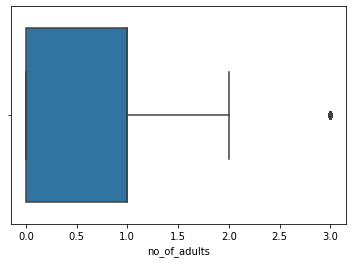

In [26]:
sns.boxplot(features.no_of_adults)

<AxesSubplot:xlabel='no_of_children'>

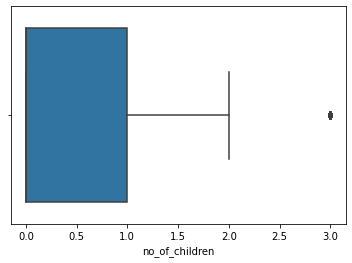

In [27]:
sns.boxplot(features.no_of_children)

There are outliers in the dataset but we are not removing them as some algorithms are not sensitive to outliers

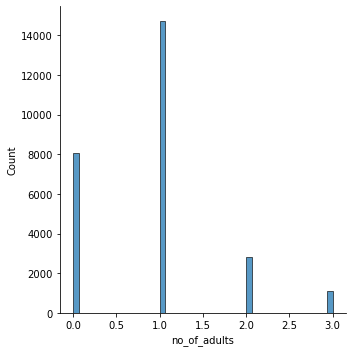

In [28]:
sns.displot(features.no_of_adults)


Number of other adults in household is mostly 1.

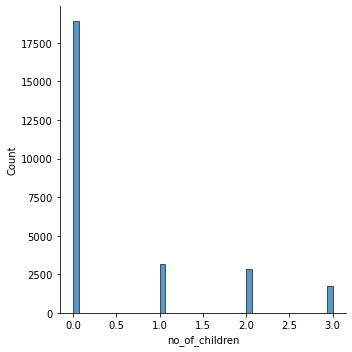

In [29]:
sns.displot(features.no_of_children)

# 

Number of children in household is mostly 0.

# Visualising categorical data

In [30]:
features.h1n1_worry.value_counts()

2.0    10667
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64

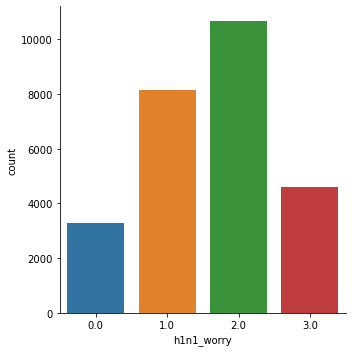

In [31]:
sns.factorplot('h1n1_worry',data=features,kind='count')

In [32]:
features.h1n1_awareness.value_counts()

1.0    14714
2.0     9487
0.0     2506
Name: h1n1_awareness, dtype: int64

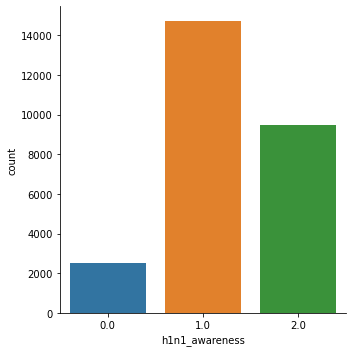

In [33]:
sns.factorplot('h1n1_awareness',data=features,kind='count')

In [34]:
features.antiviral_medication.value_counts()

0.0    25406
1.0     1301
Name: antiviral_medication, dtype: int64

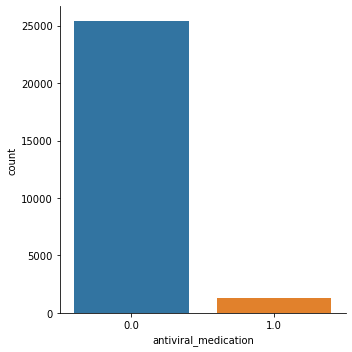

In [35]:
sns.factorplot('antiviral_medication',data=features,kind='count')

In [36]:
features.contact_avoidance.value_counts()

1.0    19436
0.0     7271
Name: contact_avoidance, dtype: int64

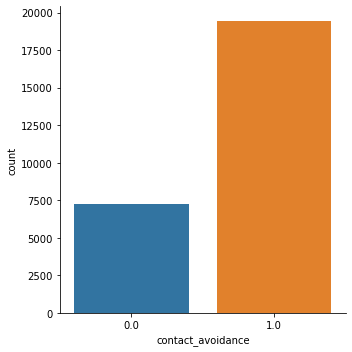

In [37]:
sns.factorplot('contact_avoidance',data=features,kind='count')

In [38]:
features.bought_face_mask.value_counts() 

0.0    24866
1.0     1841
Name: bought_face_mask, dtype: int64

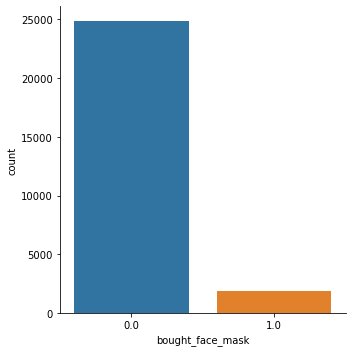

In [39]:
sns.factorplot('bought_face_mask',data=features,kind='count')

In [40]:
features.wash_hands_frequently.value_counts()

1.0    22057
0.0     4650
Name: wash_hands_frequently, dtype: int64

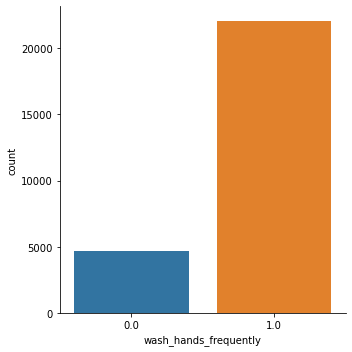

In [41]:
sns.factorplot('wash_hands_frequently',data=features,kind='count')

In [42]:
features.avoid_large_gatherings.value_counts()

0.0    17160
1.0     9547
Name: avoid_large_gatherings, dtype: int64

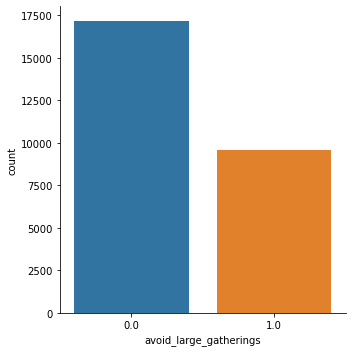

In [43]:
sns.factorplot('avoid_large_gatherings',data=features,kind='count')

In [44]:
features.reduced_outside_home_cont.value_counts()

0.0    17726
1.0     8981
Name: reduced_outside_home_cont, dtype: int64

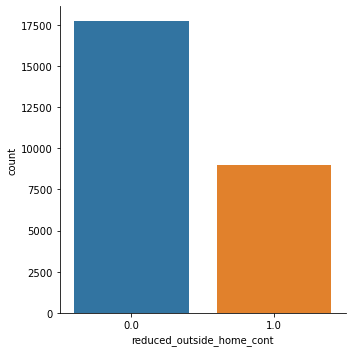

In [45]:
sns.factorplot('reduced_outside_home_cont',data=features,kind='count')

In [46]:
features.avoid_touch_face.value_counts()


1.0    18129
0.0     8578
Name: avoid_touch_face, dtype: int64

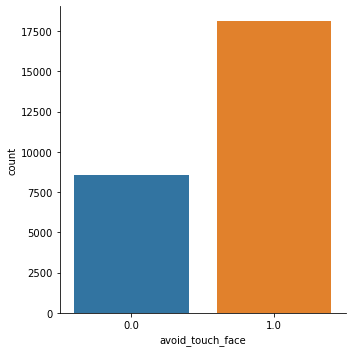

In [47]:
sns.factorplot('avoid_touch_face',data=features,kind='count')

In [48]:
features.dr_recc_h1n1_vacc.value_counts()


0.0    21299
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64

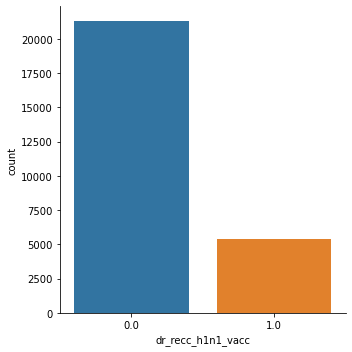

In [49]:
sns.factorplot('dr_recc_h1n1_vacc',data=features,kind='count')

In [50]:
features.chronic_medic_condition.value_counts()


0.0    19417
1.0     7290
Name: chronic_medic_condition, dtype: int64

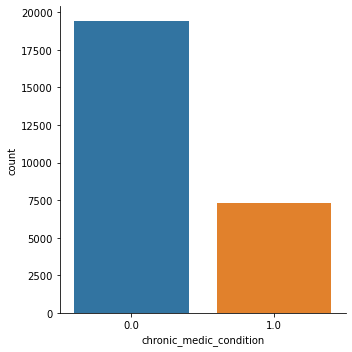

In [51]:
sns.factorplot('chronic_medic_condition',data=features,kind='count')

In [52]:
features.cont_child_undr_6_mnths.value_counts()


0.0    24569
1.0     2138
Name: cont_child_undr_6_mnths, dtype: int64

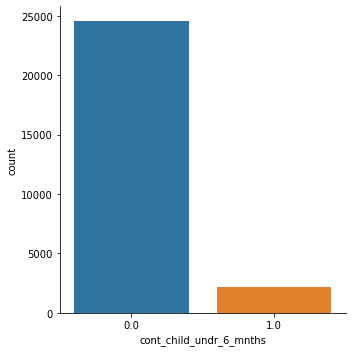

In [53]:
sns.factorplot('cont_child_undr_6_mnths',data=features,kind='count')

In [54]:
features.is_health_worker.value_counts()


0.0    23808
1.0     2899
Name: is_health_worker, dtype: int64

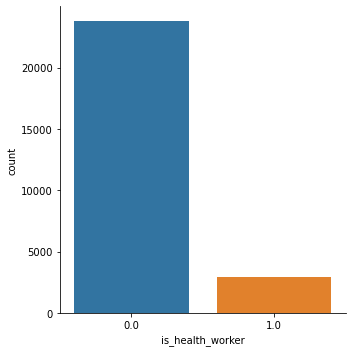

In [55]:
sns.factorplot('is_health_worker',data=features,kind='count')

In [56]:
features.has_health_insur.value_counts()


1.0    24971
0.0     1736
Name: has_health_insur, dtype: int64

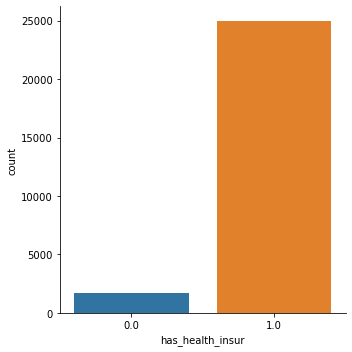

In [57]:
sns.factorplot('has_health_insur',data=features,kind='count')

In [58]:
features.is_h1n1_vacc_effective.value_counts()


4.0    12074
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: is_h1n1_vacc_effective, dtype: int64

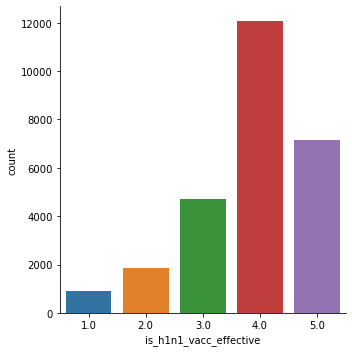

In [59]:
sns.factorplot('is_h1n1_vacc_effective',data=features,kind='count')

In [60]:
features.is_h1n1_risky.value_counts()


2.0    10307
1.0     8139
4.0     5394
5.0     1750
3.0     1117
Name: is_h1n1_risky, dtype: int64

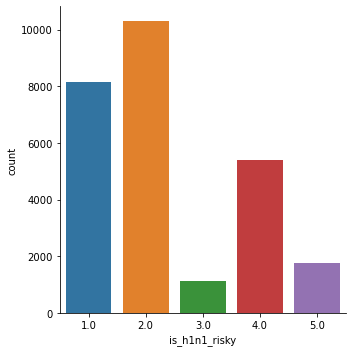

In [61]:
sns.factorplot('is_h1n1_risky',data=features,kind='count')

In [62]:
features.sick_from_h1n1_vacc.value_counts()


2.0    9524
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: sick_from_h1n1_vacc, dtype: int64

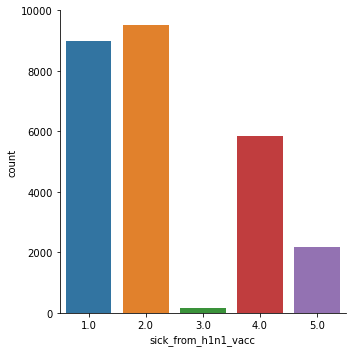

In [63]:
sns.factorplot('sick_from_h1n1_vacc',data=features,kind='count')

In [64]:
features.is_seas_vacc_effective.value_counts()


4.0    12091
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: is_seas_vacc_effective, dtype: int64

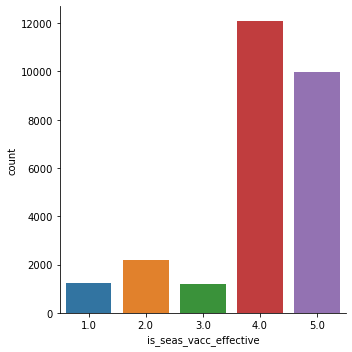

In [65]:
sns.factorplot('is_seas_vacc_effective',data=features,kind='count')

In [66]:
features.is_seas_risky.value_counts()


2.0    9468
4.0    7630
1.0    5974
5.0    2958
3.0     677
Name: is_seas_risky, dtype: int64

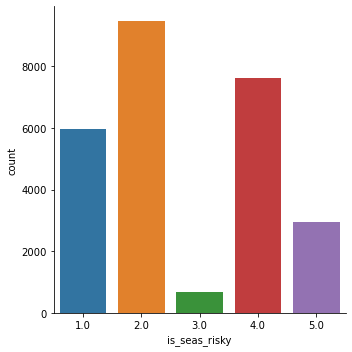

In [67]:
sns.factorplot('is_seas_risky',data=features,kind='count')

In [68]:
features.sick_from_seas_vacc.value_counts()


1.0    11870
2.0     8170
4.0     4852
5.0     1721
3.0       94
Name: sick_from_seas_vacc, dtype: int64

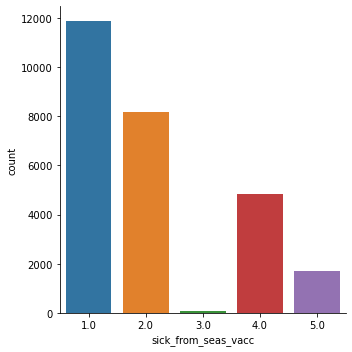

In [69]:
sns.factorplot('sick_from_seas_vacc',data=features,kind='count')

# FEATURE SCALING

# Using Min Max scaler

In [70]:
scaler = MinMaxScaler()

In [71]:
features = scaler.fit_transform(features)

In [72]:
features=pd.DataFrame(features)
col_name=['unique_id','h1n1_worry','h1n1_awareness','antiviral_medication',
          'contact_avoidance','bought_face_mask','wash_hands_frequently',
          'avoid_large_gatherings','reduced_outside_home_cont','avoid_touch_face',
          'dr_recc_h1n1_vacc','dr_recc_seasonal_vacc','chronic_medic_condition',
          'cont_child_undr_6_mnths','is_health_worker','has_health_insur',
          'is_h1n1_vacc_effective','is_h1n1_risky','sick_from_h1n1_vacc',
          'is_seas_vacc_effective','is_seas_risky','sick_from_seas_vacc',
          'age_bracket','qualification','race','sex','income_level',
          'marital_status','housing_status','employment','census_msa',
          'no_of_adults','no_of_children']
features.columns=col_name

In [73]:
x=features
x

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.25,1.000000,0.0,0.666667,1.0,0.5,0.666667,1.0,0.000000,0.0
1,0.000037,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.00,1.000000,1.0,0.666667,1.0,1.0,0.000000,0.0,0.000000,0.0
2,0.000075,0.333333,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.50,1.000000,1.0,0.000000,1.0,0.5,0.000000,0.0,0.666667,0.0
3,0.000112,0.333333,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.00,1.000000,0.0,0.666667,1.0,1.0,0.666667,0.5,0.000000,0.0
4,0.000150,0.666667,0.5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.00,1.000000,0.0,0.000000,0.0,0.5,0.000000,0.0,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.999850,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.00,1.000000,0.0,0.000000,1.0,0.5,0.666667,1.0,0.000000,0.0
26703,0.999888,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.50,1.000000,1.0,0.000000,1.0,1.0,0.000000,0.5,0.333333,0.0
26704,0.999925,0.666667,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.00,1.000000,0.0,1.000000,1.0,0.5,0.333333,0.0,0.000000,0.0
26705,0.999963,0.333333,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.00,0.333333,0.0,0.000000,0.0,1.0,0.000000,1.0,0.333333,0.0


In [74]:
y=labels
y

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0
...,...
26702,0
26703,0
26704,0
26705,0


# Correlation matrix using heatmap

In [75]:
features.corrwith(labels.h1n1_vaccine)

unique_id                   -0.003280
h1n1_worry                   0.121574
h1n1_awareness               0.117771
antiviral_medication         0.040226
contact_avoidance            0.046837
bought_face_mask             0.070413
wash_hands_frequently        0.074570
avoid_large_gatherings       0.018089
reduced_outside_home_cont    0.022080
avoid_touch_face             0.070855
dr_recc_h1n1_vacc            0.394086
dr_recc_seasonal_vacc        0.218976
chronic_medic_condition      0.094360
cont_child_undr_6_mnths      0.066712
is_health_worker             0.168056
has_health_insur             0.041891
is_h1n1_vacc_effective       0.267352
is_h1n1_risky                0.320580
sick_from_h1n1_vacc          0.074580
is_seas_vacc_effective       0.177799
is_seas_risky                0.255874
sick_from_seas_vacc          0.008415
age_bracket                  0.041074
qualification                0.020766
race                         0.041061
sex                         -0.020672
income_level

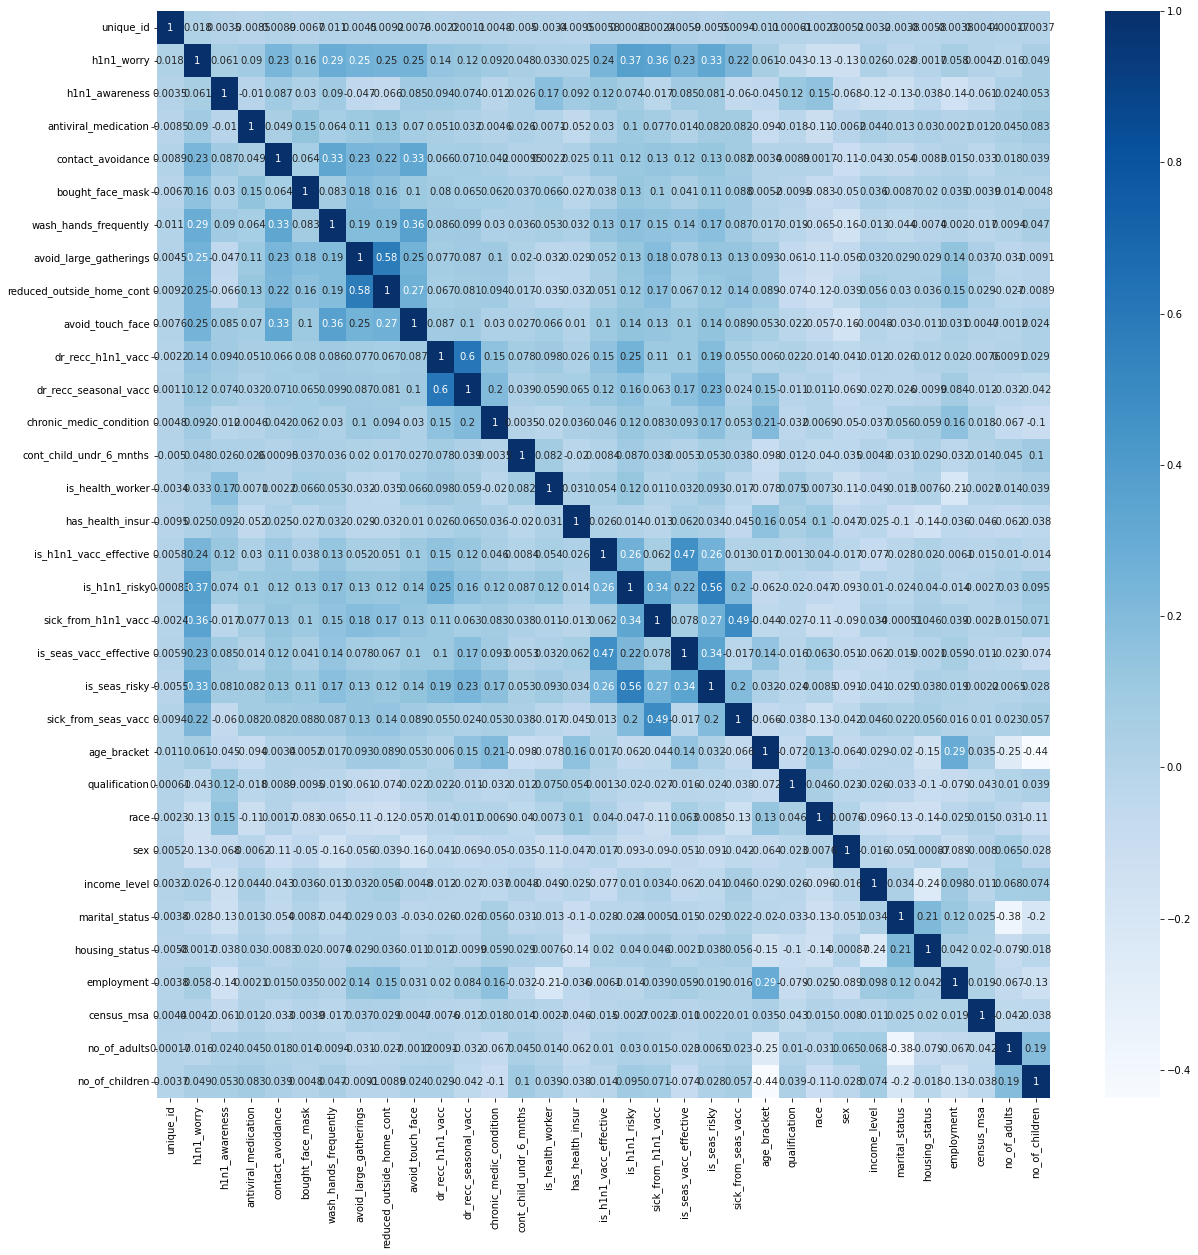

In [76]:
#get correlations of each features in dataset

corrmat = features.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map

g=sns.heatmap(features[top_corr_features].corr(),annot=True,cmap="Blues")

# Splitting the data into training and testing data

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [78]:
lr = LogisticRegression()

In [79]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.8351877607788595

In [80]:
lr.score(x_test,y_test)

0.8380132285036815

In [81]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=2,min_samples_split=4)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)

0.8201561998502194

In [82]:
dtc.score(x_test,y_test)

0.8206664170722576

In [83]:
from sklearn.ensemble import BaggingClassifier
bgcl=BaggingClassifier(n_estimators=50,base_estimator=dtc,random_state=42)
bgcl=bgcl.fit(x_train,y_train)
print(bgcl.score(x_train,y_train))

0.8201561998502194


In [84]:
print(bgcl.score(x_test,y_test))

0.8206664170722576


In [85]:
from sklearn.ensemble import AdaBoostClassifier
abcl=AdaBoostClassifier(n_estimators=100,random_state=42)
abcl=abcl.fit(x_train,y_train)
y_predict=abcl.predict(x_test)
print(abcl.score(x_train,y_train))

0.8360436503691023


In [86]:
print(abcl.score(x_test,y_test))

0.8366404592537127


In [87]:
from sklearn.ensemble import GradientBoostingClassifier

In [88]:
gbcl=GradientBoostingClassifier(learning_rate=0.2,min_samples_split=3)
gbcl=gbcl.fit(x_train,y_train)
y_predict=gbcl.predict(x_test)
print(gbcl.score(x_train,y_train))

0.8488285011233551


In [89]:
print(gbcl.score(x_test,y_test))

0.8416323474354175


In [90]:
#Random forest classifier can sample both rows and columns while others sample only rows

from sklearn.ensemble import RandomForestClassifier

In [91]:
rfcl=RandomForestClassifier(n_estimators=50,max_features=5,min_samples_split=0.01,min_samples_leaf=10)
rfcl=rfcl.fit(x_train,y_train)
print(rfcl.score(x_train,y_train))

0.8374344709532471


In [92]:
print(rfcl.score(x_test,y_test))

0.8307749906402097


GradientBoostingClassifier works the best.

# Saving the model

In [93]:
from joblib import dump,load
dump(gbcl,'vaccinatedORnot.joblib')

['vaccinatedORnot.joblib']

# Testing the model

In [94]:
model=load('vaccinatedORnot.joblib')

In [95]:
pd.set_option('display.max_columns', None)
features.head(100)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.50,0.00,0.25,0.25,0.00,0.25,0.75,0.25,1.000000,0.0,0.666667,1.0,0.5,0.666667,1.0,0.000000,0.0
1,0.000037,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00,0.75,0.75,0.75,0.25,0.75,0.25,0.00,1.000000,1.0,0.666667,1.0,1.0,0.000000,0.0,0.000000,0.0
2,0.000075,0.333333,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.50,0.00,0.00,0.75,0.00,0.25,0.00,0.50,1.000000,1.0,0.000000,1.0,0.5,0.000000,0.0,0.666667,0.0
3,0.000112,0.333333,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.50,0.50,1.00,1.00,0.75,0.00,1.00,0.00,1.000000,0.0,0.666667,1.0,1.0,0.666667,0.5,0.000000,0.0
4,0.000150,0.666667,0.5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.50,0.50,0.25,0.50,0.00,0.75,0.50,1.00,1.000000,0.0,0.000000,0.0,0.5,0.000000,0.0,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.003557,0.666667,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.00,0.25,0.75,1.00,0.25,0.75,0.00,0.50,1.000000,0.0,0.000000,1.0,0.5,1.000000,0.5,0.666667,0.0
96,0.003595,0.666667,0.5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.00,0.75,0.75,1.00,1.00,0.25,1.00,1.00,1.000000,0.0,0.000000,1.0,0.5,0.666667,1.0,0.000000,0.0
97,0.003632,0.666667,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.00,0.25,0.00,1.00,0.75,0.00,0.50,0.50,1.000000,1.0,0.333333,1.0,0.5,0.666667,0.5,0.333333,0.0
98,0.003670,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.75,0.25,1.00,0.25,0.25,1.00,0.00,1.00,1.000000,0.0,0.666667,1.0,0.5,0.666667,0.5,1.000000,1.0


In [96]:
#let's test the model for a randomly selected set of features from row 97
inputfeatures=np.array([[0.003632,0.666667,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.00,0.25,0.00,1.00,0.75,0.00,0.50,0.50,1.000000,1.0,0.333333,1.0,0.5,0.666667,0.5,0.333333,1.0
]])
model.predict(inputfeatures)

array([0], dtype=int64)

which is actually zero if we see at the label

In [97]:
labels.head(100)

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0
...,...
95,0
96,0
97,0
98,0
